In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import os
from tensorflow.keras.models import load_model

In [2]:
model = load_model('models/weights.best.basic_cnn.hdf5')

directory = 'models/basic_cnn_history'

##put all csvs into dataframes and into list
frames = [pd.read_csv(directory +'/' +path) for path in os.listdir(directory)]

### and separate dataframes
train_loss, val_loss, val_acc, train_acc = frames[0], frames[1], frames[2], frames[3]

Text(0, 0.5, 'Loss')

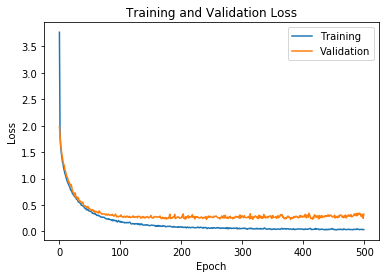

In [3]:
plt.title("Training and Validation Loss")
plt.plot(train_loss["Value"] , label='Training')
plt.plot(val_loss["Value"], label='Validation' )
plt.legend()

plt.xlabel("Epoch")
plt.ylabel("Loss")

Text(0, 0.5, 'Loss')

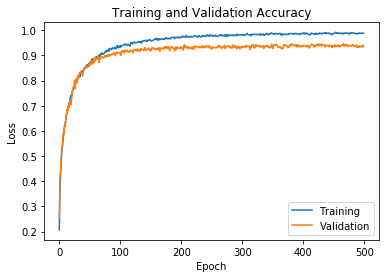

In [4]:
plt.title("Training and Validation Accuracy")
plt.plot(train_acc["Value"] , label='Training')
plt.plot(val_acc["Value"], label='Validation' )
plt.legend()

plt.xlabel("Epoch")
plt.ylabel("Accuracy")

In [5]:
print("Best validation loss epoch: ", np.argmin(val_loss['Value'].values))
print("Best validation accuracy epoch: ", np.argmax(val_acc['Value'].values))
print("Best validation loss: ", val_loss.Value.min())
print("Best validation accuracy: ", val_acc.Value.max())

Best validation loss epoch:  379
Best validation accuracy epoch:  466
Best validation loss:  0.22409571707248688
Best validation accuracy:  0.9473382830619812


In [6]:
print('Top epochs for loss:')
val_loss.sort_values(by='Value')[:10]

Top epochs for loss:


,Wall time,Step,Value
379,1.582670e+09,379,0.224096
241,1.582669e+09,241,0.226297
317,1.582669e+09,317,0.227516
415,1.582670e+09,415,0.229852
206,1.582668e+09,206,0.230082
175,1.582668e+09,175,0.231620
263,1.582669e+09,263,0.234176
222,1.582669e+09,222,0.234231
425,1.582670e+09,425,0.235932
369,1.582670e+09,369,0.236700


By the 175th epoch, the model had already reached 0.2316 validation loss. The lowest val loss model (379th epoch) offered a 0.0075 decrease in loss from this.


In [7]:
print("Best validation accuracies")
val_acc.sort_values(by='Value', ascending=False)[:10]

Best validation accuracies


,Wall time,Step,Value
466,1.582670e+09,466,0.947338
381,1.582670e+09,381,0.946193
425,1.582670e+09,425,0.946193
429,1.582670e+09,429,0.945049
414,1.582670e+09,414,0.945049
431,1.582670e+09,431,0.944476
470,1.582670e+09,470,0.944476
348,1.582669e+09,348,0.944476
379,1.582670e+09,379,0.943904
421,1.582670e+09,421,0.943331


Highest validation accuracy occured at the 466th epoch

The model below gave the best performance yet, as of 2/26/2020. 72 epochs of training

Average validation accuracy: 66.13%

n_mels = 60

In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import ModelCheckpoint, TensorBoard, EarlyStopping
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Convolution2D, Conv2D, MaxPooling2D, GlobalAveragePooling2D
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import utils
from tensorflow.keras.metrics import AUC

num_rows = 60 
num_columns = 174    #number of frames / max padding
num_channels = 1
num_labels = 10     #categories

In [9]:
def get_conv_model():
    
    model = Sequential()

    model.add(Conv2D(filters=16, kernel_size=(2,2), kernel_regularizer=l2(0.0001),
                    input_shape=(num_rows, num_columns, num_channels), activation='relu'))
    model.add(MaxPooling2D(pool_size=2))

    model.add(Conv2D(filters=32, kernel_size=(2,2), kernel_regularizer=l2(0.0001), activation='relu'))
    model.add(Dropout(0.2))

    model.add(Conv2D(filters=64, kernel_size=(3,3), kernel_regularizer=l2(0.0001), activation='relu'))
    model.add(MaxPooling2D(pool_size=2))
    model.add(Dropout(0.2))

    model.add(Flatten())

    model.add(Dense(64, activation='relu')) 
    model.add(Dropout(0.5))

    model.add(Dense(num_labels, activation='softmax'))

    model.compile(loss='categorical_crossentropy', metrics=['accuracy', AUC()], optimizer='adam')
    
    return model

In [10]:
model = get_conv_model()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 59, 173, 16)       80        
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 29, 86, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 85, 32)        2080      
_________________________________________________________________
dropout (Dropout)            (None, 28, 85, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 26, 83, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 41, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 13, 41, 64)        0

In [24]:
#Importing tensorboard logs
val_acc_dict = {}

path = 'past_logs/acc_csvs_1'

for i, fpath in enumerate(sorted(os.listdir(path), key=lambda name: name[-28:])):
#     val_acc_dict
    print(fpath)
    val_acc_dict[f"fold{i+1}"] = pd.read_csv(os.path.join(path,fpath))

run-fold1_20200226-181350-tag-epoch_val_acc.csv
run-fold2_20200226-182138-tag-epoch_val_acc.csv
run-fold3_20200226-182926-tag-epoch_val_acc.csv
run-fold4_20200226-183725-tag-epoch_val_acc.csv
run-fold5_20200226-184534-tag-epoch_val_acc.csv
run-fold6_20200226-185337-tag-epoch_val_acc.csv
run-fold7_20200226-190115-tag-epoch_val_acc.csv
run-fold8_20200226-190855-tag-epoch_val_acc.csv
run-fold9_20200226-191629-tag-epoch_val_acc.csv
run-fold10_20200226-192409-tag-epoch_val_acc.csv


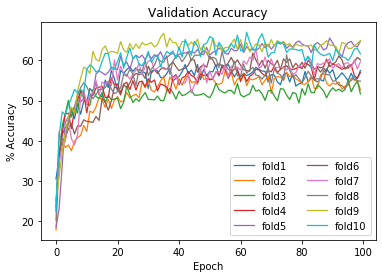

In [54]:
fig, ax = plt.subplots()

ax.set_title("Validation Accuracy")

for fold, df in val_acc_dict.items():
    ax.plot(df.Value*100, linewidth=1.25, label=fold)

ax.set_xlabel('Epoch')
ax.set_ylabel('% Accuracy')
ax.legend(ncol=2)

In [56]:
model_dict = {}

for i in range(1,11):
    model_dict[i] = load_model('models/mels_basic_cnn_fold{}.hdf5'.format(i))
    

In [58]:
from sklearn.metrics import confusion_matrix

In [62]:
labels = np.array(['dog_bark', 'children_playing', 'children_playing', ...,
       'car_horn', 'car_horn', 'car_horn'], dtype='<U16')

In [63]:
labels

array(['dog_bark', 'children_playing', 'children_playing', 'Ellipsis',
       'car_horn', 'car_horn', 'car_horn'], dtype='<U16')